In [1]:
import pysr as ps 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Detected Jupyter notebook. Loading juliacall extension. Set `PYSR_AUTOLOAD_EXTENSIONS=no` to disable.


In [5]:
df = pd.read_table('1train.dat' ,sep="\s+" , usecols=['x', 'y'])

In [6]:
df.head()

,x,y
0,0.598418,0.000210
1,0.621777,0.000256
2,0.297639,0.000036
3,0.623486,0.000260
4,0.574399,0.000175


In [26]:
X = df.x.to_numpy().reshape(-1, 1)
y = df.y.to_numpy().reshape(-1, 1)

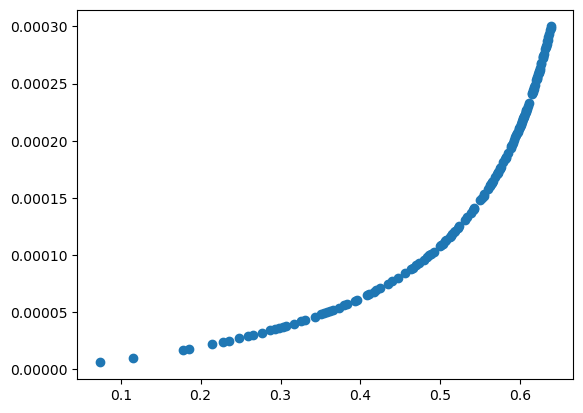

In [27]:
plt.scatter(X , y)

In [28]:
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test = train_test_split(X,y , random_state= 42 , test_size= 0.2)

In [29]:
default_pysr_params = dict(
    populations=30,
    model_selection="best",
)

In [30]:
from pysr import PySRRegressor
model = PySRRegressor(
    niterations=5,
    binary_operators=["+", "*"],
    unary_operators=["cos", "log2", "square"],
   
    **default_pysr_params
)

model.fit(X_train, y_train) 

/Users/chambo_enjoyer/anaconda3/lib/python3.11/site-packages/pysr/sr.py:1297: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                       0.0001607798   
	1        0.528622                                (0.0003298514 * x0)   
	2        1.147332                           square(0.024268176 * x0)   
	3  >>>>  1.648987                    square(square(x0 * -0.2038458))   
	4        0.046364                square(square(cos(1.7747804) * x0))   
	5        0.124743    square(square((x0 + 0.043726876) * -0.1891359))   
	6        0.003791  ((1.8854195 * x0) * square(((square(1.2001994 ...   
	
	           loss  complexity  
	0  7.405786e-09           1  
	1  2.572858e-09           3  
	2  8.168381e-10           4  
	3  1.570327e-10           5  
	4  1.499182e-10           6  
	5  1.323364e-10           7  
	6  1.283833e-10          15  
]

In [31]:
model.sympy()

0.00172666096543509*x0**4

In [41]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error , r2_score

score = mean_squared_error(y_test ,model.predict(X_test) )
score

1.2990743567622717e-10

In [33]:
y_test.std()

7.867443464472222e-05

In [35]:
df_test = pd.read_table('1test.dat'  ,sep="\s+" , usecols=['x', 'y']) 
X_main_test = df.x.to_numpy().reshape(-1, 1)
y_main_test = df.y.to_numpy().reshape(-1, 1)
precision_main  = model.predict(X_main_test)
mse_score_main = mean_squared_error(y_main_test , precision_main )
mse_score_main

1.5160763487403341e-10

In [37]:
mae_score = mean_absolute_error(y_main_test , precision_main )
mae_score

1.055674477934912e-05

In [39]:
y_main_test.std()


8.489776963436017e-05

In [42]:
r2_score = r2_score(y_main_test , precision_main)
r2_score

0.9789656783487596